# **Overview**
In this notebook, we will use pandas to examine 2018 lightning strike data collected by the National Oceanic and Atmospheric Administration (NOAA). Then, we will calculate the total number of strikes for each month and plot this information on a bar graph.

# Importing Packages and Libraries

In [1]:
# Importing libraries and packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
# Reading Dataset 
df = pd.read_csv('/kaggle/input/lightening-strikes-dataset-noaa/lightening strikes dataset.csv')

In [3]:
# Inspecting the dataset first 10 rows
df.head(10)

,date,number_of_strikes,center_point_geom
0,2018-01-03,194,POINT(-75 27)
1,2018-01-03,41,POINT(-78.4 29)
2,2018-01-03,33,POINT(-73.9 27)
3,2018-01-03,38,POINT(-73.8 27)
4,2018-01-03,92,POINT(-79 28)
5,2018-01-03,119,POINT(-78 28)
6,2018-01-03,35,POINT(-79.3 28)
7,2018-01-03,60,POINT(-79.1 28)
8,2018-01-03,41,POINT(-78.7 28)
9,2018-01-03,119,POINT(-78.6 28)


In [4]:
# Checking dataset total entries(Rows, Columns) 
df.shape

(3401012, 3)

In [5]:
# Get more information about the data, including data types of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3401012 entries, 0 to 3401011
Data columns (total 3 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   date               object
 1   number_of_strikes  int64 
 2   center_point_geom  object
dtypes: int64(1), object(2)
memory usage: 77.8+ MB


# **Convert the date column to datetime**
info will provide the total number of rows (3,401,012) and columns (3). It will also state the names and data types of each column, as well as the size of the dataframe in memory.

In this case, notice that the date column is an 'object' type rather than a 'date' type. Objects are strings. When dates are encoded as strings, they cannot be manipulated as easily. Converting string dates to datetime will enable you to work with them much more easily.

Let's convert to datetime using the pandas function to_datetime().

In [6]:
# Convert date column to datetime
df['date']= pd.to_datetime(df['date'])

# **Calculate the days with the most strikes**
As part of discovering, you want to get an idea of the highest data points. For this dataset, we can calculate the top 10 days of 2018 with the most number of lightning strikes using the groupby(), sum(), and sort_values() functions from pandas.

When using groupby() on the date column, the function combines all rows with the same date into a single row.

Then, using sum() performs a sum calculation on all other summable columns. In this case, we are summing all the lightning strikes that happened on each day. Notice that the center_point_geom column is not included in the outCenter point geom column is not relevant for our desired output.able.

Finally, sort_values() returns the results in descending order of total strikes for each day in the data.

In [7]:
# Calculating days with most strikes 
df = df.drop('center_point_geom', axis = 1)
df.groupby(['date']).sum().sort_values('number_of_strikes', ascending= False).head(10)

,number_of_strikes
date,
2018-08-29,1070457
2018-08-17,969774
2018-08-28,917199
2018-08-27,824589
2018-08-30,802170
2018-08-19,786225
2018-08-18,741180
2018-08-16,734475
2018-08-31,723624


# **Convert the dates to month text and month numbers**

In [8]:
# Create a new 'month' column for numerical month representation
df['month'] = df['date'].dt.month
# Create a new 'month_txt' column for abbreviated month names
df['month_txt'] = df['date'].dt.month_name().str.slice(stop=3)
df.head()

,date,number_of_strikes,month,month_txt
0,2018-01-03,194,1,Jan
1,2018-01-03,41,1,Jan
2,2018-01-03,33,1,Jan
3,2018-01-03,38,1,Jan
4,2018-01-03,92,1,Jan


# **Create a new dataframe**
The objective is to plot the total number of strikes per month as a bar graph. To help with the plotting, we will create a new dataframe called dy_month. This will allow us to easily access the month, month text, and total number of strikes for each month.

In [9]:
# Create a new helper dataframe for plotting.
# Group by 'month' and 'month_txt', then aggregate and sort
df_by_month = df.groupby(['month','month_txt']).sum(numeric_only=True).sort_values('month', ascending=True).head(12).reset_index()
df_by_month


,month,month_txt,number_of_strikes
0,1,Jan,860045
1,2,Feb,2071315
2,3,Mar,854168
3,4,Apr,1524339
4,5,May,4166726
5,6,Jun,6445083
6,7,Jul,8320400
7,8,Aug,15525255
8,9,Sep,3018336
9,10,Oct,1093962


# **Bar Chart for the Lightening Strike According to Month**

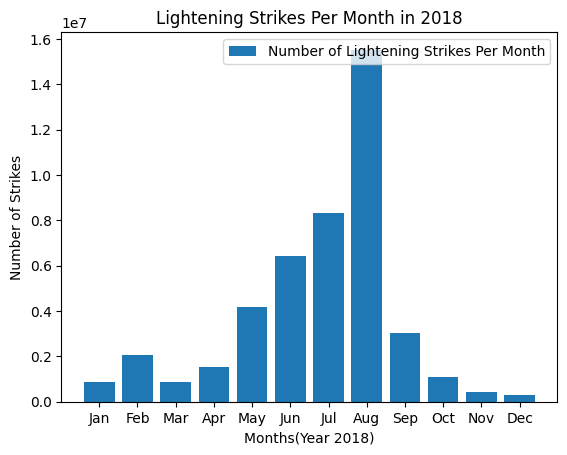

In [10]:
plt.bar(x=df_by_month['month_txt'], height = df_by_month['number_of_strikes'], label="Number of Lightening Strikes Per Month")

plt.xlabel("Months(Year 2018)")
plt.ylabel("Number of Strikes")
plt.title("Lightening Strikes Per Month in 2018")
plt.legend()
plt.show()

# **Line Chart for the Lightening Strike According to Month**

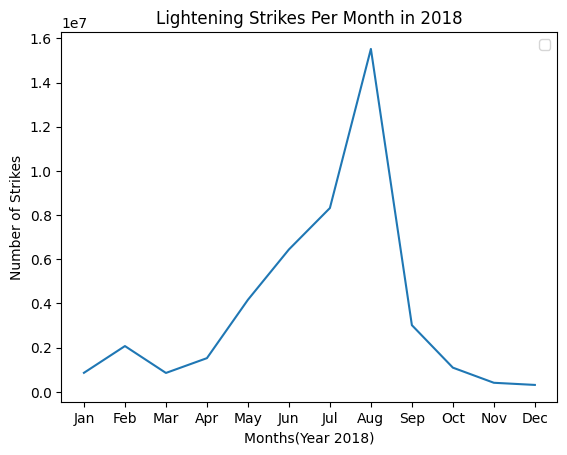

In [11]:
plt.plot(df_by_month['month_txt'], df_by_month['number_of_strikes'])
plt.xlabel('Months(Year 2018)')
plt.ylabel('Number of Strikes')
plt.title('Lightening Strikes Per Month in 2018')
plt.legend()
plt.show()